In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
def dipole(m, r, r0):
    """Calculate a field in point r created by a dipole moment m located in r0.
    Spatial components are the outermost axis of r and returned B.
    """
    # we use np.subtract to allow r and r0 to be a python lists, not only np.array
    R = np.subtract(np.transpose(r), r0).T
    
    # assume that the spatial components of r are the outermost axis
    norm_R = np.sqrt(np.einsum("i...,i...", R, R))
    
    # calculate the dot product only for the outermost axis,
    # that is the spatial components
    m_dot_R = np.tensordot(m, R, axes=1)

    # tensordot with axes=0 does a general outer product - we want no sum
    B = 3 * m_dot_R * R / norm_R**5 - np.tensordot(m, 1 / norm_R**3, axes=0)
    
    # include the physical constant
    B *= 1e-7

    return B

In [ ]:
m = [0, 0.1]
r = np.meshgrid(X,Y)

xx = np.linspace(-10,10,21)

y0 = [0] * 21 
y1 = [5] * 21  

In [ ]:
B_line0 = []
for i in range(len(xx)):
    B_line0.append( dipole( m= [0, 0.1], r = np.meshgrid(X,Y), r0 = [xx[i],y0[i]]))
B_line1 = []
for i in range(len(xx)):
    B_line0.append( dipole( m= [0, 0.1], r = np.meshgrid(X,Y), r0 = [xx[i],y1[i]]))

In [114]:
B_line = B_line0+B_line1

In [115]:
np_B = np.array(B_line)

In [116]:
np_Bx = np_B[:,0].sum(axis=0)
np_By = np_B[:,1].sum(axis=0)
npBB = np_Bx ** 2 + np_By ** 2

npBB_log = np.log(npBB)

In [49]:
X = np.linspace(-30, 30, num = 1000)
Y = np.linspace(-30, 30, num = 1000)
Z = np.linspace(-1, 1)

B0x, B0y = dipole(m=[0, 0.1 ], r=np.meshgrid(X, Y), r0=[0,0])
B1x, B1y = dipole(m=[0, 0.1 ], r=np.meshgrid(X, Y), r0=[0,10])
B2x, B2y = dipole(m=[0, 0.1 ], r=np.meshgrid(X, Y), r0=[10,0])
B3x, B3y = dipole(m=[0, 0.1 ], r=np.meshgrid(X, Y), r0=[10,10])
B4x, B4y = dipole(m=[0, 0.1 ], r=np.meshgrid(X, Y), r0=[-10,10])
B5x, B5y = dipole(m=[0, 0.1 ], r=np.meshgrid(X, Y), r0=[-10,0])




C:\Users\SSHS\AppData\Local\Temp\ipykernel_29564\3039095858.py:16: RuntimeWarning: invalid value encountered in divide
  B = 3 * m_dot_R * R / norm_R**5 - np.tensordot(m, 1 / norm_R**3, axes=0)
C:\Users\SSHS\AppData\Local\Temp\ipykernel_29564\3039095858.py:16: RuntimeWarning: divide by zero encountered in divide
  B = 3 * m_dot_R * R / norm_R**5 - np.tensordot(m, 1 / norm_R**3, axes=0)


In [50]:
import seaborn as sns

In [51]:
Bx = B0x + B1x + B2x + B3x + B4x + B5x
By = B0y + B1y + B2y + B3y + B4y + B5y

In [52]:
B = Bx **2 + By**2 

In [53]:
Blog = np.log(B)

In [103]:
npBB_log[546:624]

array([[-49.60992264, -49.59760461, -49.58526409, ..., -49.58526409,
        -49.59760461, -49.60992264],
       [-49.6101812 , -49.59786664, -49.58552963, ..., -49.58552963,
        -49.59786664, -49.6101812 ],
       [-49.61043445, -49.59812327, -49.58578971, ..., -49.58578971,
        -49.59812327, -49.61043445],
       ...,
       [-49.60952513, -49.59720178, -49.58485585, ..., -49.58485585,
        -49.59720178, -49.60952513],
       [-49.60925392, -49.59692693, -49.5845773 , ..., -49.5845773 ,
        -49.59692693, -49.60925392],
       [-49.60897793, -49.59664724, -49.58429384, ..., -49.58429384,
        -49.59664724, -49.60897793]])

<Axes: >

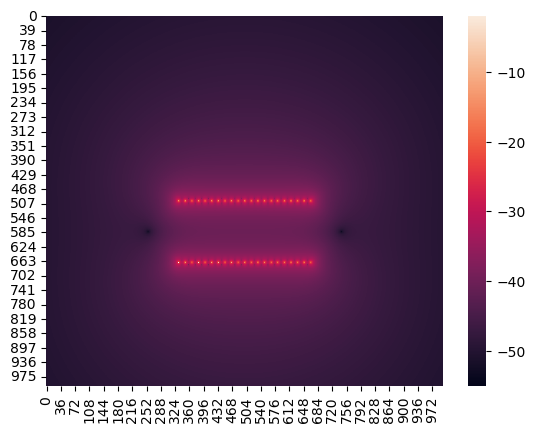

In [107]:
sns.heatmap(npBB_log)

<Axes: >

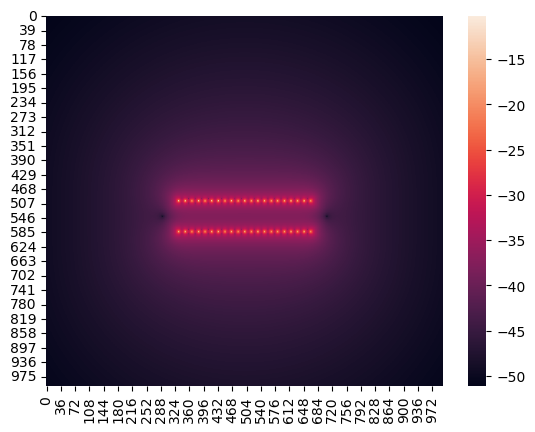

In [117]:
sns.heatmap(npBB_log)

<Axes: >

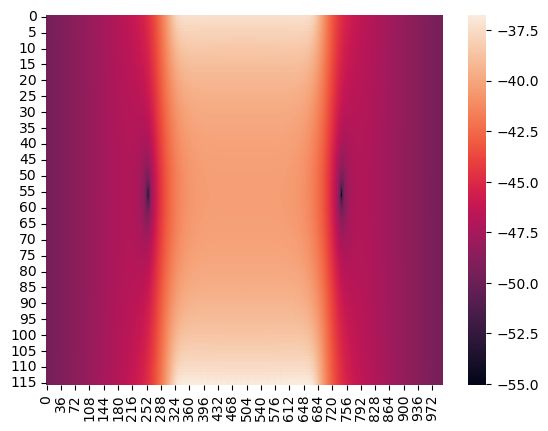

In [111]:
sns.heatmap(npBB_log[527:643])

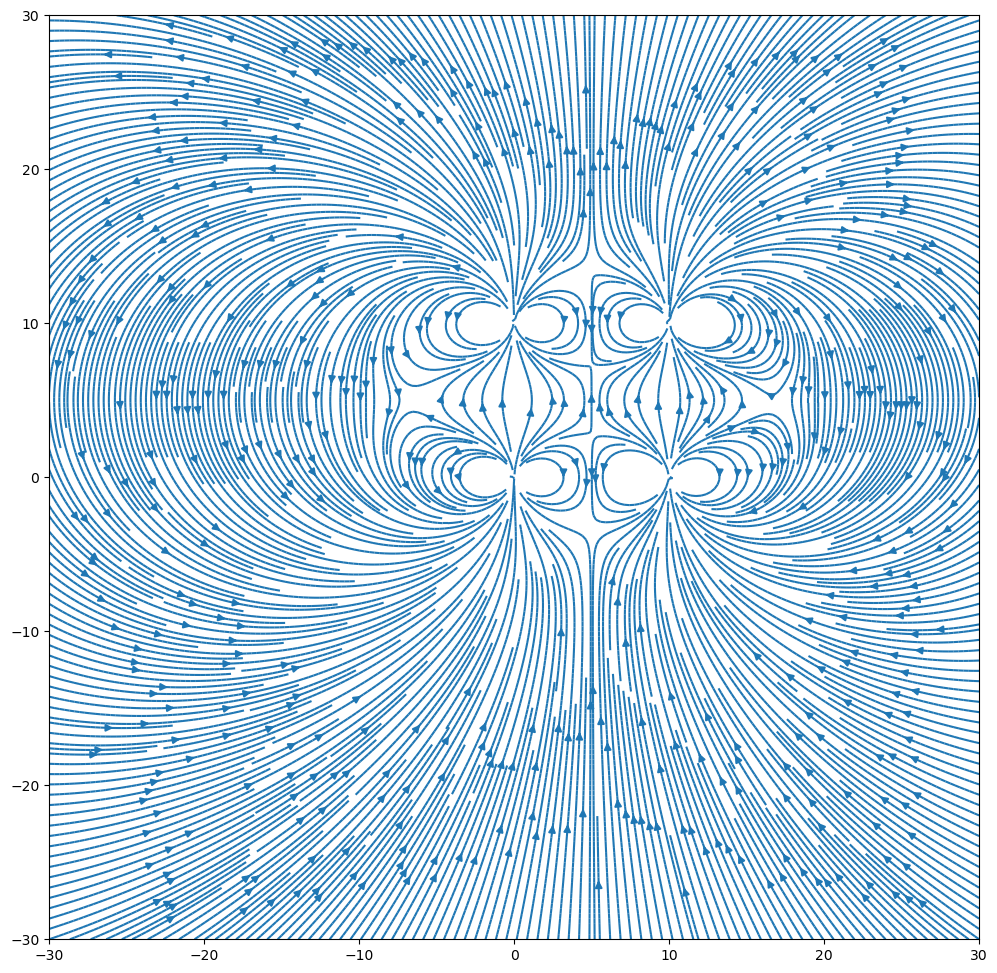

In [29]:
plt.figure(figsize=(12, 12))
plt.streamplot(X, Y, Bx, By, density=6)
plt.margins(0, 0)